# PCA
***Analyse de Composantes Principales***

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [185]:
! pip freeze | grep numpy 

numpy==1.18.4


In [163]:
! pip freeze | grep scikit-learn

scikit-learn==0.22.2.post1


In [162]:
! pip freeze | grep scipy

scipy==1.4.1


In [177]:
! pip freeze | grep joblib

joblib==0.14.1


## Le Datatset

***Nous allons travailler pour l'essaie avec le dataset 'breast_cancer'***

In [192]:
from sklearn.datasets import load_breast_cancer

***

In [193]:
dir(load_breast_cancer())

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [194]:
cancer = load_breast_cancer()

In [195]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [196]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [197]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [198]:
X = cancer.data
y = cancer.target

## To Dataframe

In [199]:
# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']

df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

In [200]:
df.shape

(569, 31)

In [201]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [203]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [204]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

### séparation des target


In [205]:
df_features = df.drop(['target'], axis=1)

In [134]:
from sklearn.preprocessing import StandardScaler

In [136]:
scale= StandardScaler()

In [207]:
X_scaled = scale.fit_transform(df_features)

## PCA

In [167]:
from sklearn.decomposition import PCA

In [208]:
model_pca = PCA(2)

In [212]:
model_pca.fit(X_scaled)

AttributeError: 'PCA' object has no attribute '_validate_data'

In [171]:
model = PCA(6)
model.fit(X)

AttributeError: 'PCA' object has no attribute '_validate_data'

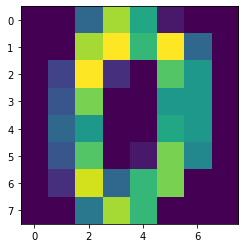

In [217]:
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.images
Xx = digits.data
yy = digits.target

plt.imshow(images[0])

In [214]:
from sklearn.ensemble import IsolationForest


In [222]:
model = IsolationForest(random_state=0, contamination=0.02)
model.fit(Xx)
outliers = model.predict(X) == -1 

plt.figure(figsize=(12, 3))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(images[outliers][i])
  plt.title(y[outliers][i])

AttributeError: 'IsolationForest' object has no attribute '_validate_data'

In [234]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(Xx)

AttributeError: 'PCA' object has no attribute '_validate_data'

In [236]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

Automatically created module for IPython interactive environment


In [237]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

AttributeError: 'DecisionTreeClassifier' object has no attribute '_validate_data'